In [1]:
import phreeqcrm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def advectionbmi_py(c: np.ndarray, bc_conc: np.ndarray, ncomps: int, nxyz: int):
    # Advect
    for i in range(nxyz - 1, 0, -1):
        for j in range(ncomps):
            c[j * nxyz + i] = c[j * nxyz + i - 1]              # component j
    
    # Cell zero gets boundary condition
    for j in range(ncomps):
        c[j * nxyz] = bc_conc[j]                               # component j

In [3]:
bmi = phreeqcrm.BMIPhreeqcRM()
bmi.initialize("AdvectBMI_py.yaml")

ncomps = bmi.get_value_ptr("ComponentCount")[0]
nxyz = bmi.get_value_ptr("GridCellCount")[0]

# Get initial concentrations
c = bmi.get_value_ptr("Concentrations")

# --------------------------------------------------------------------------
# Set boundary condition
# --------------------------------------------------------------------------
bc1 = [0]           # solution 0 from Initial IPhreeqc instance

bc_conc = bmi.InitialPhreeqc2Concentrations(bc1)

solution_total_molality_Cl = np.empty((nxyz,), dtype=float)
solution_total_molality_Na = np.empty((nxyz,), dtype=float)
solution_total_molality_K  = np.empty((nxyz,), dtype=float)
solution_total_molality_Ca = np.empty((nxyz,), dtype=float)

nsteps = 100
Na = np.empty((nsteps,), dtype=float)
Cl = np.empty((nsteps,), dtype=float)
K = np.empty((nsteps,), dtype=float)
Ca = np.empty((nsteps,), dtype=float)

por_volumes = np.empty((nsteps,), dtype=float)

print(f"step Na Cl K Ca Pore_vol")
for s in range(nsteps):
    bmi.update()

    advectionbmi_py(c, bc_conc, ncomps, nxyz)
    bmi.set_value("Concentrations", c)

    solution_total_molality_Cl = bmi.get_value("solution_total_molality_Cl", solution_total_molality_Cl)
    solution_total_molality_Na = bmi.get_value("solution_total_molality_Na", solution_total_molality_Na)
    solution_total_molality_K  = bmi.get_value("solution_total_molality_K",  solution_total_molality_K)
    solution_total_molality_Ca = bmi.get_value("solution_total_molality_Ca", solution_total_molality_Ca)

    cell = nxyz - 1
    step = s + 1
    por_vol = (step + 0.5) / 40

    Na[s] = solution_total_molality_Na[cell]
    Cl[s] = solution_total_molality_Cl[cell]
    K[s]  = solution_total_molality_K[cell]
    Ca[s] = solution_total_molality_Ca[cell]
    por_volumes[s] = por_vol
    print(f"{step} {Na[s]:.4e} {Cl[s]:.4e} {K[s]:.4e} {Ca[s]:.4e} {por_volumes[s]:.4e}")

step Na Cl K Ca Pore_vol
1 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 3.7500e-02
2 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 6.2500e-02
3 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 8.7500e-02
4 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 1.1250e-01
5 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 1.3750e-01
6 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 1.6250e-01
7 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 1.8750e-01
8 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 2.1250e-01
9 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 2.3750e-01
10 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 2.6250e-01
11 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 2.8750e-01
12 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 3.1250e-01
13 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 3.3750e-01
14 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 3.6250e-01
15 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 3.8750e-01
16 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 4.1250e-01
17 1.0000e-03 0.0000e+00 2.0000e-04 0.0000e+00 4.3750e-0

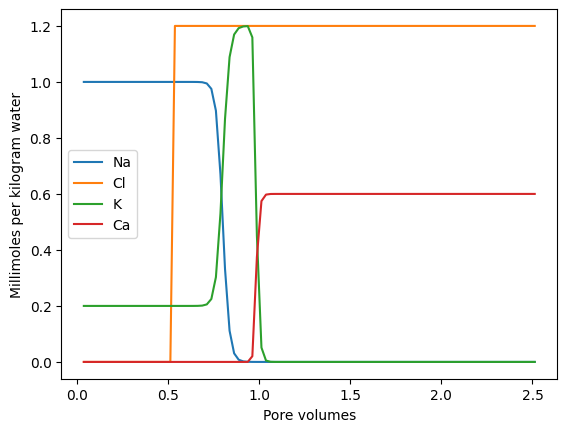

In [4]:
fig, ax = plt.subplots()
ax.plot(por_volumes, Na*1000, label='Na')
ax.plot(por_volumes, Cl*1000, label='Cl')
ax.plot(por_volumes, K*1000,  label='K')
ax.plot(por_volumes, Ca*1000, label='Ca')
ax.set_xlabel('Pore volumes')
ax.set_ylabel('Millimoles per kilogram water')
ax.legend()
plt.show()